# Neptune 

### install *neptune*

In [ ]:
! pip install -U neptune
import neptune

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 448.1/448.1 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 61.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 6.9 MB/s eta 0:00:00


### run neptune

In [ ]:
from getpass import getpass


my_api_token = getpass("Enter your Neptune API token: ")
my_project = "mikhailamzar/FYP2"

Enter your Neptune API token: ··········


In [ ]:
run = neptune.init_run(
    project=my_project,
    api_token=my_api_token,
    capture_hardware_metrics=True,
    capture_stderr=True,
    capture_stdout=True,
)

https://app.neptune.ai/mikhailamzar/FYP2/e/FYP-25


# DT Model Experiments

## 1. Importing important libraries and Preparing the data

- Importing dataset file from Google Drive.
- Preprocess the dataset.

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from io import StringIO
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score

import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.display.max_columns = None
pd.options.display.max_rows = None

from google.colab import drive
drive.mount('/content/drive/')
df=pd.read_csv("/content/drive/MyDrive/ALLFLOWMETER_HIKARI2021.csv")
df.drop(['uid','originh','originp','responh','responp'], axis=1, inplace=True)

Mounted at /content/drive/


## One vs One. [df_sub]

In [ ]:
df.traffic_category.value_counts()

Benign                 347431
Background             170151
Probing                 23388
Bruteforce               5884
Bruteforce-XML           5145
XMRIGCC CryptoMiner      3279
Name: traffic_category, dtype: int64

In [2]:
df = df[ (df['traffic_category'] != "XMRIGCC CryptoMiner") & (df['traffic_category'] != "Bruteforce-XML") & (df['traffic_category'] != "Benign") & (df['traffic_category'] != "Bruteforce")]
df.traffic_category.value_counts()

Background    170151
Probing        23388
Name: traffic_category, dtype: int64

In [ ]:
# dropping a percentage of the instances to achieve a more stable distribution
# df_sub = df.drop(df[df['traffic_category'] == 'Benign'].sample(frac=.93).index)

df_sub = df.drop(df[df['traffic_category'] == 'Background'].sample(frac=.86).index)

df_sub.traffic_category.value_counts()

Background             23821
XMRIGCC CryptoMiner     3279
Name: traffic_category, dtype: int64

In [ ]:
df.head(3)

In [3]:
#top_col=['flow_pkts_payload.std','flow_iat.min','flow_pkts_payload.max','down_up_ratio','fwd_pkts_payload.max','fwd_iat.min','fwd_subflow_bytes','flow_iat.max','payload_bytes_per_second','active.tot','bwd_iat.tot','flow_iat.std','flow_pkts_payload.min','fwd_last_window_size','active.min','bwd_pkts_payload.min','fwd_iat.max','fwd_header_size_tot','bwd_iat.max','bwd_iat.std','bwd_init_window_size','bwd_iat.min','fwd_pkts_payload.std','fwd_iat.std','fwd_init_window_size','flow_duration','flow_duration','flow_iat.avg','flow_pkts_payload.tot','fwd_iat.tot','bwd_pkts_payload.std','bwd_iat.avg','fwd_pkts_per_sec','flow_pkts_payload.avg','active.max','fwd_pkts_payload.tot','active,avg','bwd_pkts_payload.avg','fwd_header_size_max','fwd_pkts_payload.avg']
#X_top = df[[c for c in df.columns if c in top_col]]

X=df.drop(['Label','traffic_category'], axis=1)
y=df.traffic_category

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [5]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(class_weight='balanced',random_state=1)
dt = dt.fit(X_train, y_train)

{'Background': {'precision': 0.9999216377705946, 'recall': 0.9999020491321553, 'f1-score': 0.9999118433554378, 'support': 51046}, 'Probing': {'precision': 0.9992874447769702, 'recall': 0.999429874572406, 'f1-score': 0.9993586545998717, 'support': 7016}, 'accuracy': 0.9998449932830422, 'macro avg': {'precision': 0.9996045412737824, 'recall': 0.9996659618522806, 'f1-score': 0.9996352489776548, 'support': 58062}, 'weighted avg': {'precision': 0.9998450042057283, 'recall': 0.9998449932830422, 'f1-score': 0.9998449980468186, 'support': 58062}}


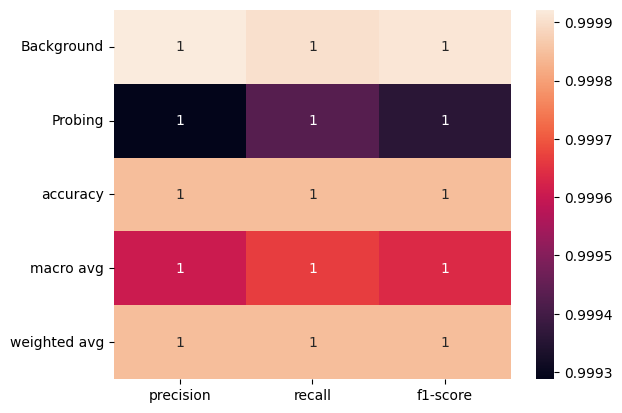

In [6]:
y_pred=dt.predict(X_test)

from sklearn.metrics import classification_report
report = (classification_report(y_test, y_pred, output_dict=True))
print(report)

class_rep = sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)

# Convert Seaborn object to Matplotlib format (matplotlib.Figure)
CR = class_rep.figure

In [7]:
from sklearn.metrics import classification_report
report = (classification_report(y_test, y_pred))
# print("Benign(34743) vs Probing(23388) : (Almost balanced distribution)")
print(report)

              precision    recall  f1-score   support

  Background       1.00      1.00      1.00     51046
     Probing       1.00      1.00      1.00      7016

    accuracy                           1.00     58062
   macro avg       1.00      1.00      1.00     58062
weighted avg       1.00      1.00      1.00     58062



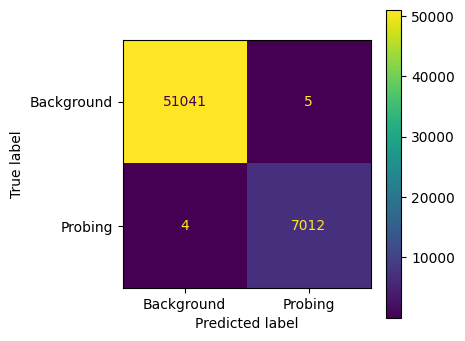

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

cm = confusion_matrix(y_test, y_pred, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax)
plt.show()

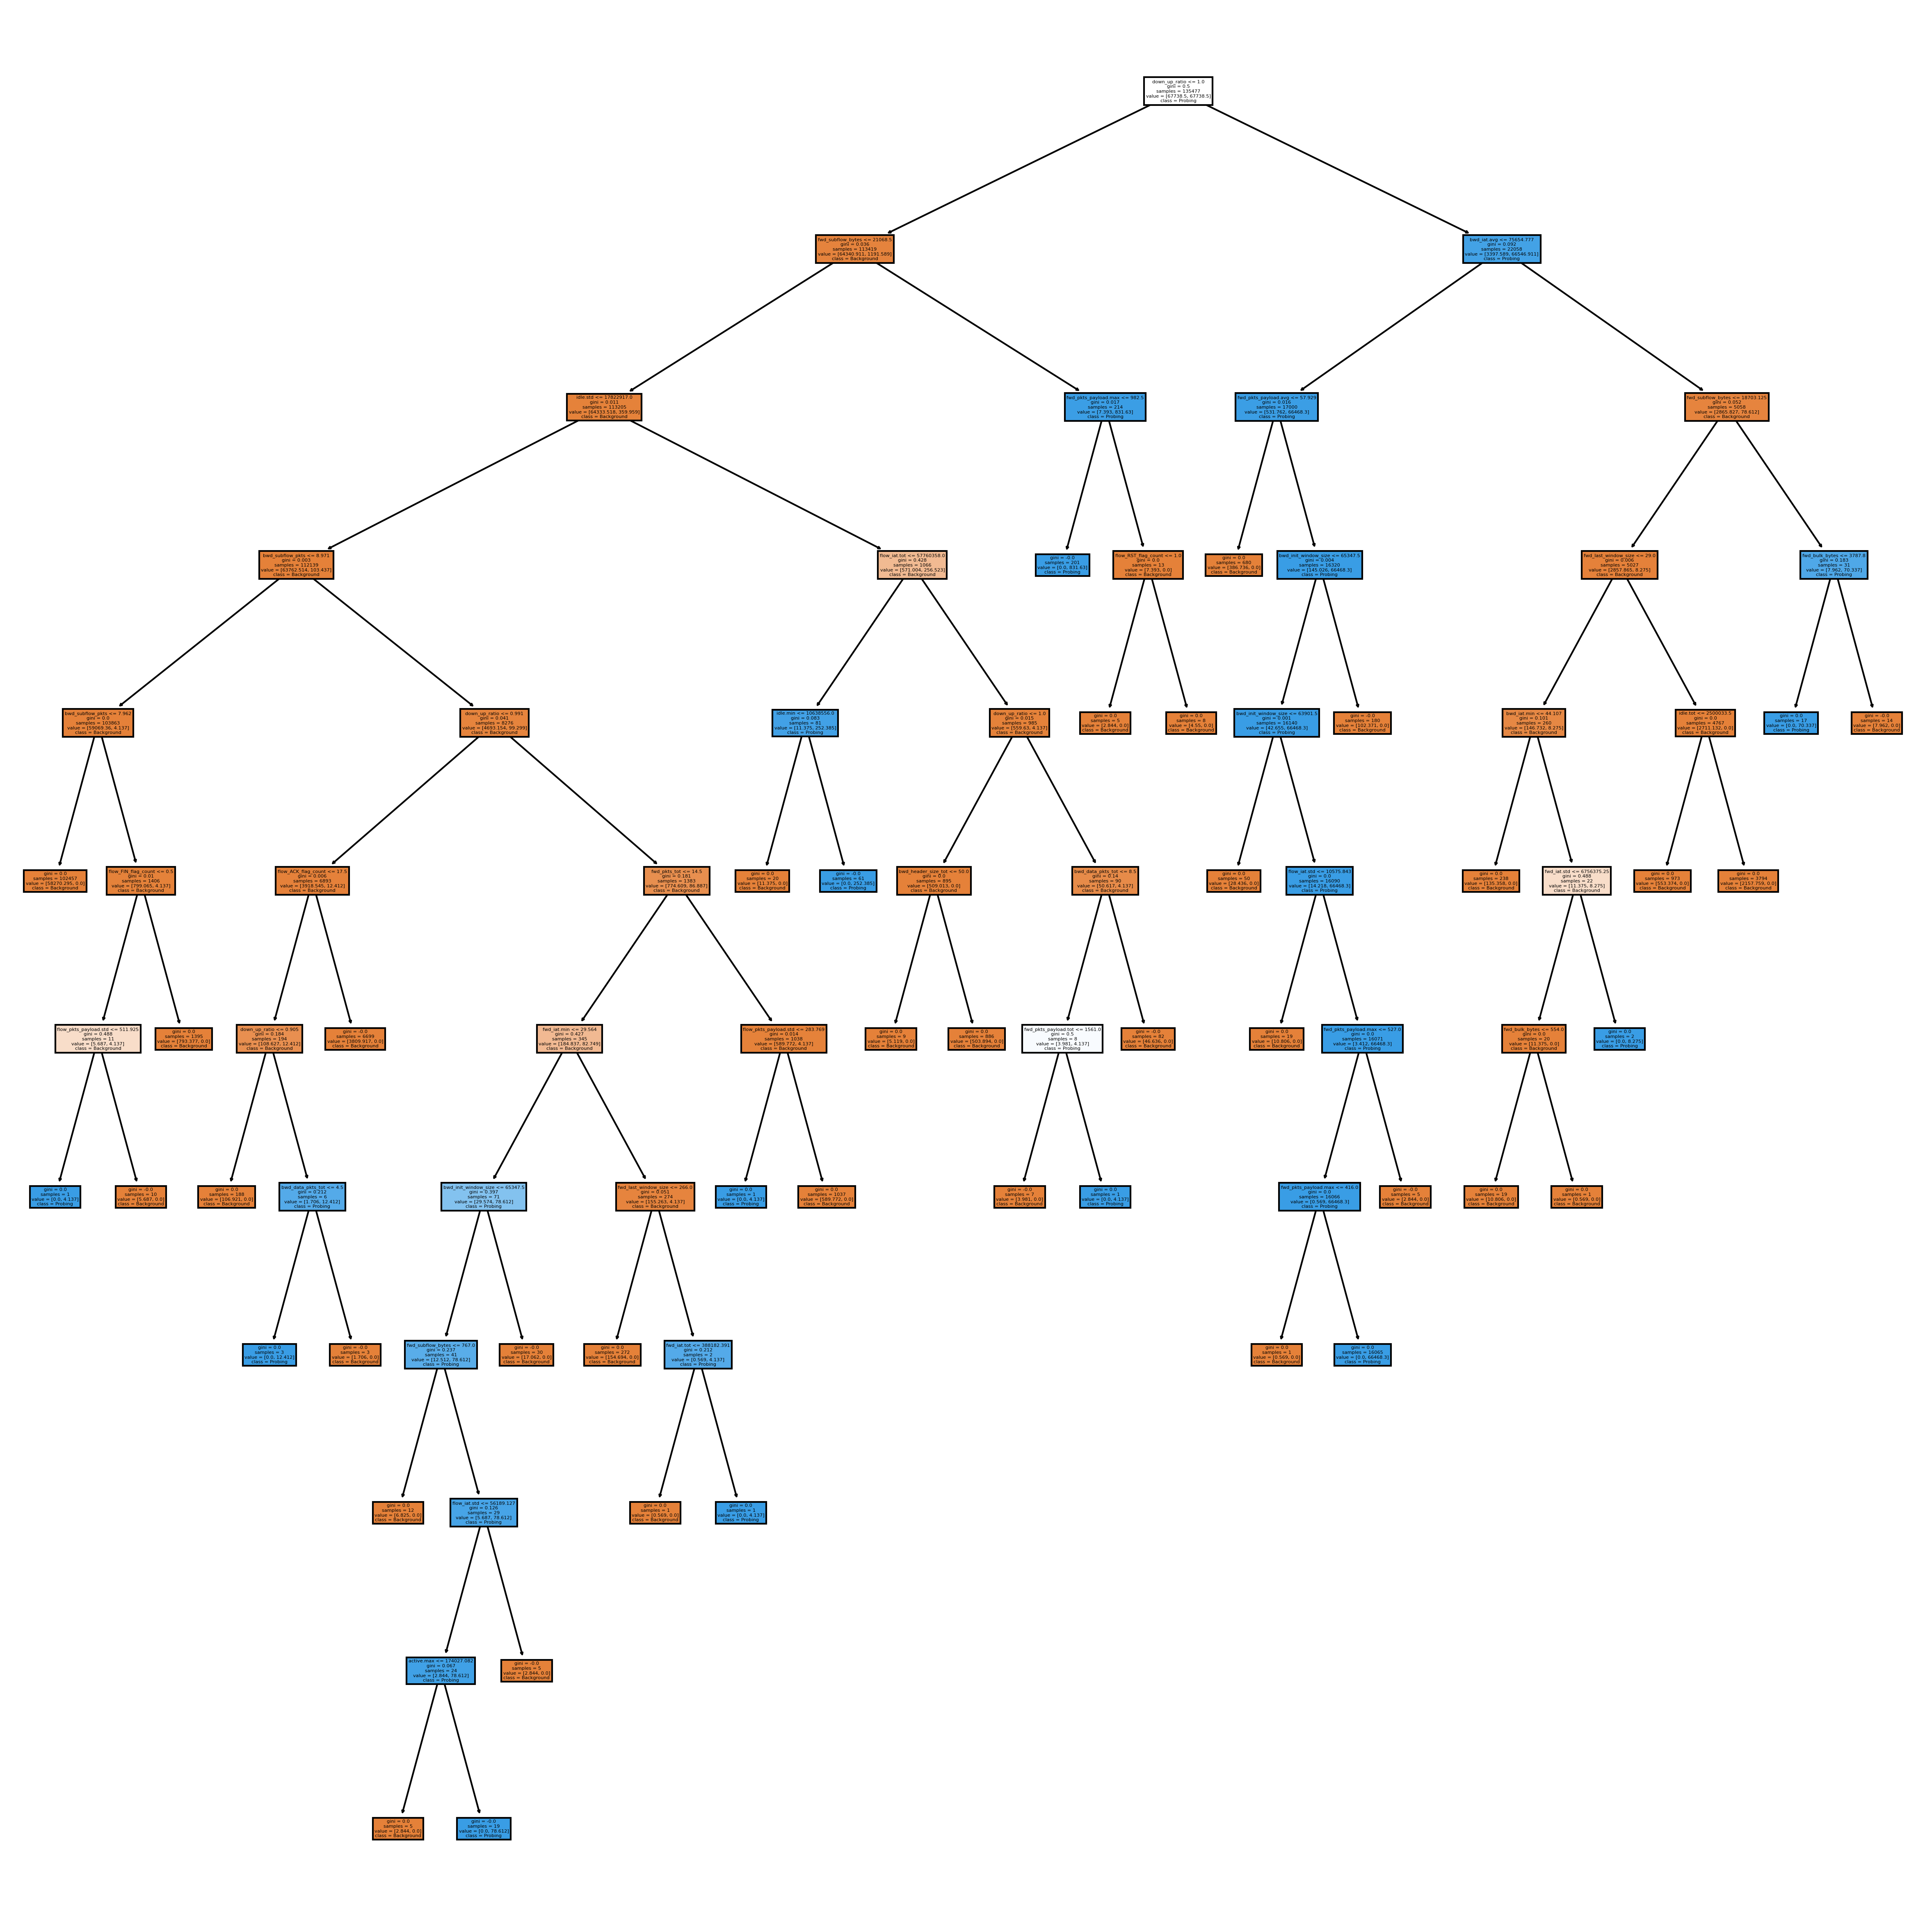

In [11]:
from sklearn import tree

dt_fig_2, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20), dpi=300)
tree.plot_tree(dt,
               feature_names=X.columns,
                       class_names=['Background', 'Probing'],
                      #class_names=['Benign', 'Background','Probing','Bruteforce','Bruteforce-XML','XMRIGCC Cryptominer'],
                       filled=True);

## One vs One. [df]

In [ ]:
df = df[ (df['traffic_category'] != "Bruteforce") & (df['traffic_category'] != "XMRIGCC CryptoMiner") & (df['traffic_category'] != "Background") & (df['traffic_category'] != "Bruteforce-XML")]
df.traffic_category.value_counts()

Benign     347431
Probing     23388
Name: traffic_category, dtype: int64

In [ ]:
df_sub = df.drop(df[df['traffic_category'] == 'Benign'].sample(frac=.9).index)
df_sub.traffic_category.value_counts()

Benign     34743
Probing    23388
Name: traffic_category, dtype: int64

In [ ]:
df.head(3)

### cont

In [ ]:
X=df.drop(['Label','traffic_category'], axis=1)

top_col=['flow_pkts_payload.std','flow_iat.min','flow_pkts_payload.max','down_up_ratio','fwd_pkts_payload.max','fwd_iat.min','fwd_subflow_bytes','flow_iat.max','payload_bytes_per_second','active.tot','bwd_iat.tot','flow_iat.std','flow_pkts_payload.min','fwd_last_window_size','active.min','bwd_pkts_payload.min','fwd_iat.max','fwd_header_size_tot','bwd_iat.max','bwd_iat.std','bwd_init_window_size','bwd_iat.min','fwd_pkts_payload.std','fwd_iat.std','fwd_init_window_size','flow_duration','flow_duration','flow_iat.avg','flow_pkts_payload.tot','fwd_iat.tot','bwd_pkts_payload.std','bwd_iat.avg','fwd_pkts_per_sec','flow_pkts_payload.avg','active.max','fwd_pkts_payload.tot','active,avg','bwd_pkts_payload.avg','fwd_header_size_max','fwd_pkts_payload.avg']
X_top = df[[c for c in df.columns if c in top_col]]

y=df.traffic_category

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy',class_weight='balanced',random_state=1)
dt = dt.fit(X_train, y_train)

{'Benign': {'precision': 0.9387620611985954, 'recall': 0.9156960567974671, 'f1-score': 0.9270856099349681, 'support': 104230}, 'Probing': {'precision': 0.08248929727472068, 'recall': 0.11259977194982897, 'f1-score': 0.09522087627312721, 'support': 7016}, 'accuracy': 0.8650468331445625, 'macro avg': {'precision': 0.510625679236658, 'recall': 0.514147914373648, 'f1-score': 0.5111532431040476, 'support': 111246}, 'weighted avg': {'precision': 0.8847591333477971, 'recall': 0.8650468331445625, 'f1-score': 0.8746220339738415, 'support': 111246}}


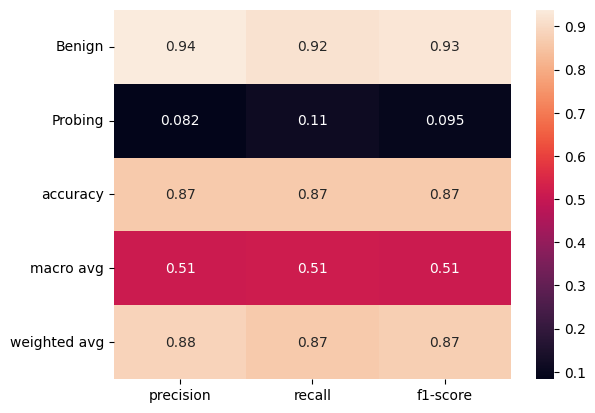

In [ ]:
y_pred=dt.predict(X_test)

from sklearn.metrics import classification_report
report = (classification_report(y_test, y_pred, output_dict=True))
print(report)

class_rep = sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)

# Convert Seaborn object to Matplotlib format (matplotlib.Figure)
CR = class_rep.figure

In [ ]:
from sklearn.metrics import classification_report
report = (classification_report(y_test, y_pred))
print(report)

              precision    recall  f1-score   support

      Benign       0.94      0.92      0.93    104230
     Probing       0.08      0.11      0.10      7016

    accuracy                           0.87    111246
   macro avg       0.51      0.51      0.51    111246
weighted avg       0.88      0.87      0.87    111246



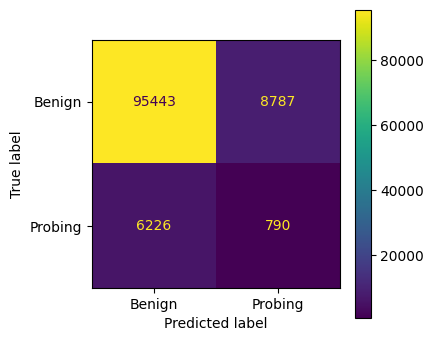

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

cm = confusion_matrix(y_test, y_pred, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax)
plt.show()

In [ ]:
from io import StringIO
from IPython.display import Image, display

from sklearn.tree import export_graphviz

try:
    import pydotplus
    pydotplus_installed = True
    
except:
    print('PyDotPlus must be installed to execute the remainder of the cells associated with this question.')
    print('Please see the instructions for this question for details.')
    pydotplus_installed = False

if pydotplus_installed:
    
    # Create an output destination for the file
    dot_data = StringIO()

    export_graphviz(dt, out_file=dot_data, filled=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

    # View the tree image
    filename = 'dt_tree.png'
    graph.write_png(filename)
    img = Image(filename=filename)
    display(img)
    
else:
    print('This cell not executed because PyDotPlus could not be loaded.')

#### Neptune run

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred, average='macro')
pre = precision_score(y_test,y_pred, average='macro')
rec = recall_score(y_test,y_pred, average='macro')

In [ ]:
#Logging by runtime

run["train_dataset"].track_files("/content/drive/MyDrive/ALLFLOWMETER_HIKARI2021.csv")

PARAMS = {"criterion":"entropy","Resample":"None","Test size":0.3}
 
run["my_params"] = PARAMS
run["description"] = "dt_default : This decision tree model was trained with default data without no resampling method applied."
# You can also specify parameters one by one

# Update lr value
run["Result/score"] = report
run["Result/accuracy"] = acc
run["Result/f1-score"] = f1
run["Result/precision"] = pre
run["Result/recall"] = rec
run["classif_report"].upload(CR)
run["decision_tree"].upload('dt_tree.png')
run["Result/confusion_matrix"] = fig


In [ ]:
# Logging by model
model = neptune.init_model(
    name="dt_binary_bg_bfx",
    key="DTB1V2", 
    project="mikhailamzar/FYP2", 
    api_token=my_api_token, # your credentials
)
run["my_params"] = PARAMS
run["description"] = "dt_default : This decision tree model was trained with default data without no resampling method applied."

model["Dataset"].track_files("/content/drive/MyDrive/ALLFLOWMETER_HIKARI2021.csv")
model["Result/score"] = report
model["Result/accuracy"] = acc
model["Result/f1-score"] = f1
model["Result/precision"] = pre
model["Result/recall"] = rec
model["classif_report"].upload(CR)
model["decision_tree"].upload('dt_tree.png')
#model["Result/confusion_matrix"] = fig

https://app.neptune.ai/mikhailamzar/FYP2/m/FYP-DTB1V2


In [ ]:
run.stop()

Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 4 operations to synchronize with Neptune. Do not kill this process.
All 4 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/mikhailamzar/FYP2/e/FYP-17/metadata


# temp

### cross-validation

In [ ]:
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=5, shuffle=True, random_state=1)

In [ ]:
def acc_score(model):
    return np.mean(cross_val_score(model, X_train,y_train, cv=k_fold, scoring="accuracy"))

In [ ]:
from sklearn.model_selection import cross_val_score
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

print("Accuracy: " + str(acc_score(dt)))

#Neptune
cv_acc = str(acc_score(dt))
#run["Result/cross_validation_accuracy"] = cv_acc

Accuracy: 0.8232070669261866


### FINDING OPTIMAL PARAMETER FOR TUNING

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20, 30],
    'min_samples_leaf': [5, 10, 20, 50, 80],
    'class_weight':["balanced","None"],
    'criterion': ["gini", "entropy"]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=1, scoring = "f1_macro")

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
300 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _vali

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'None'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20, 30],
                         'min_samples_leaf': [5, 10, 20, 50, 80]},
             scoring='f1_macro', verbose=1)

In [ ]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.nlargest(1,"mean_test_score").params
print(score_df)

In [ ]:
dt_best=grid_search.best_estimator_

In [ ]:
from sklearn import tree

def get_dt_graph(dt_classifier):
    treefig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(dt_classifier,
                       feature_names=X.columns,
                       class_names=['Benign', 'Probing'],
                       #class_names=['Benign', 'Background','Probing','Bruteforce','Bruteforce-XML','XMRIGCC Cryptominer'],
                       filled=True)
    
dt_fig = get_dt_graph(dt_best)
dt_fig

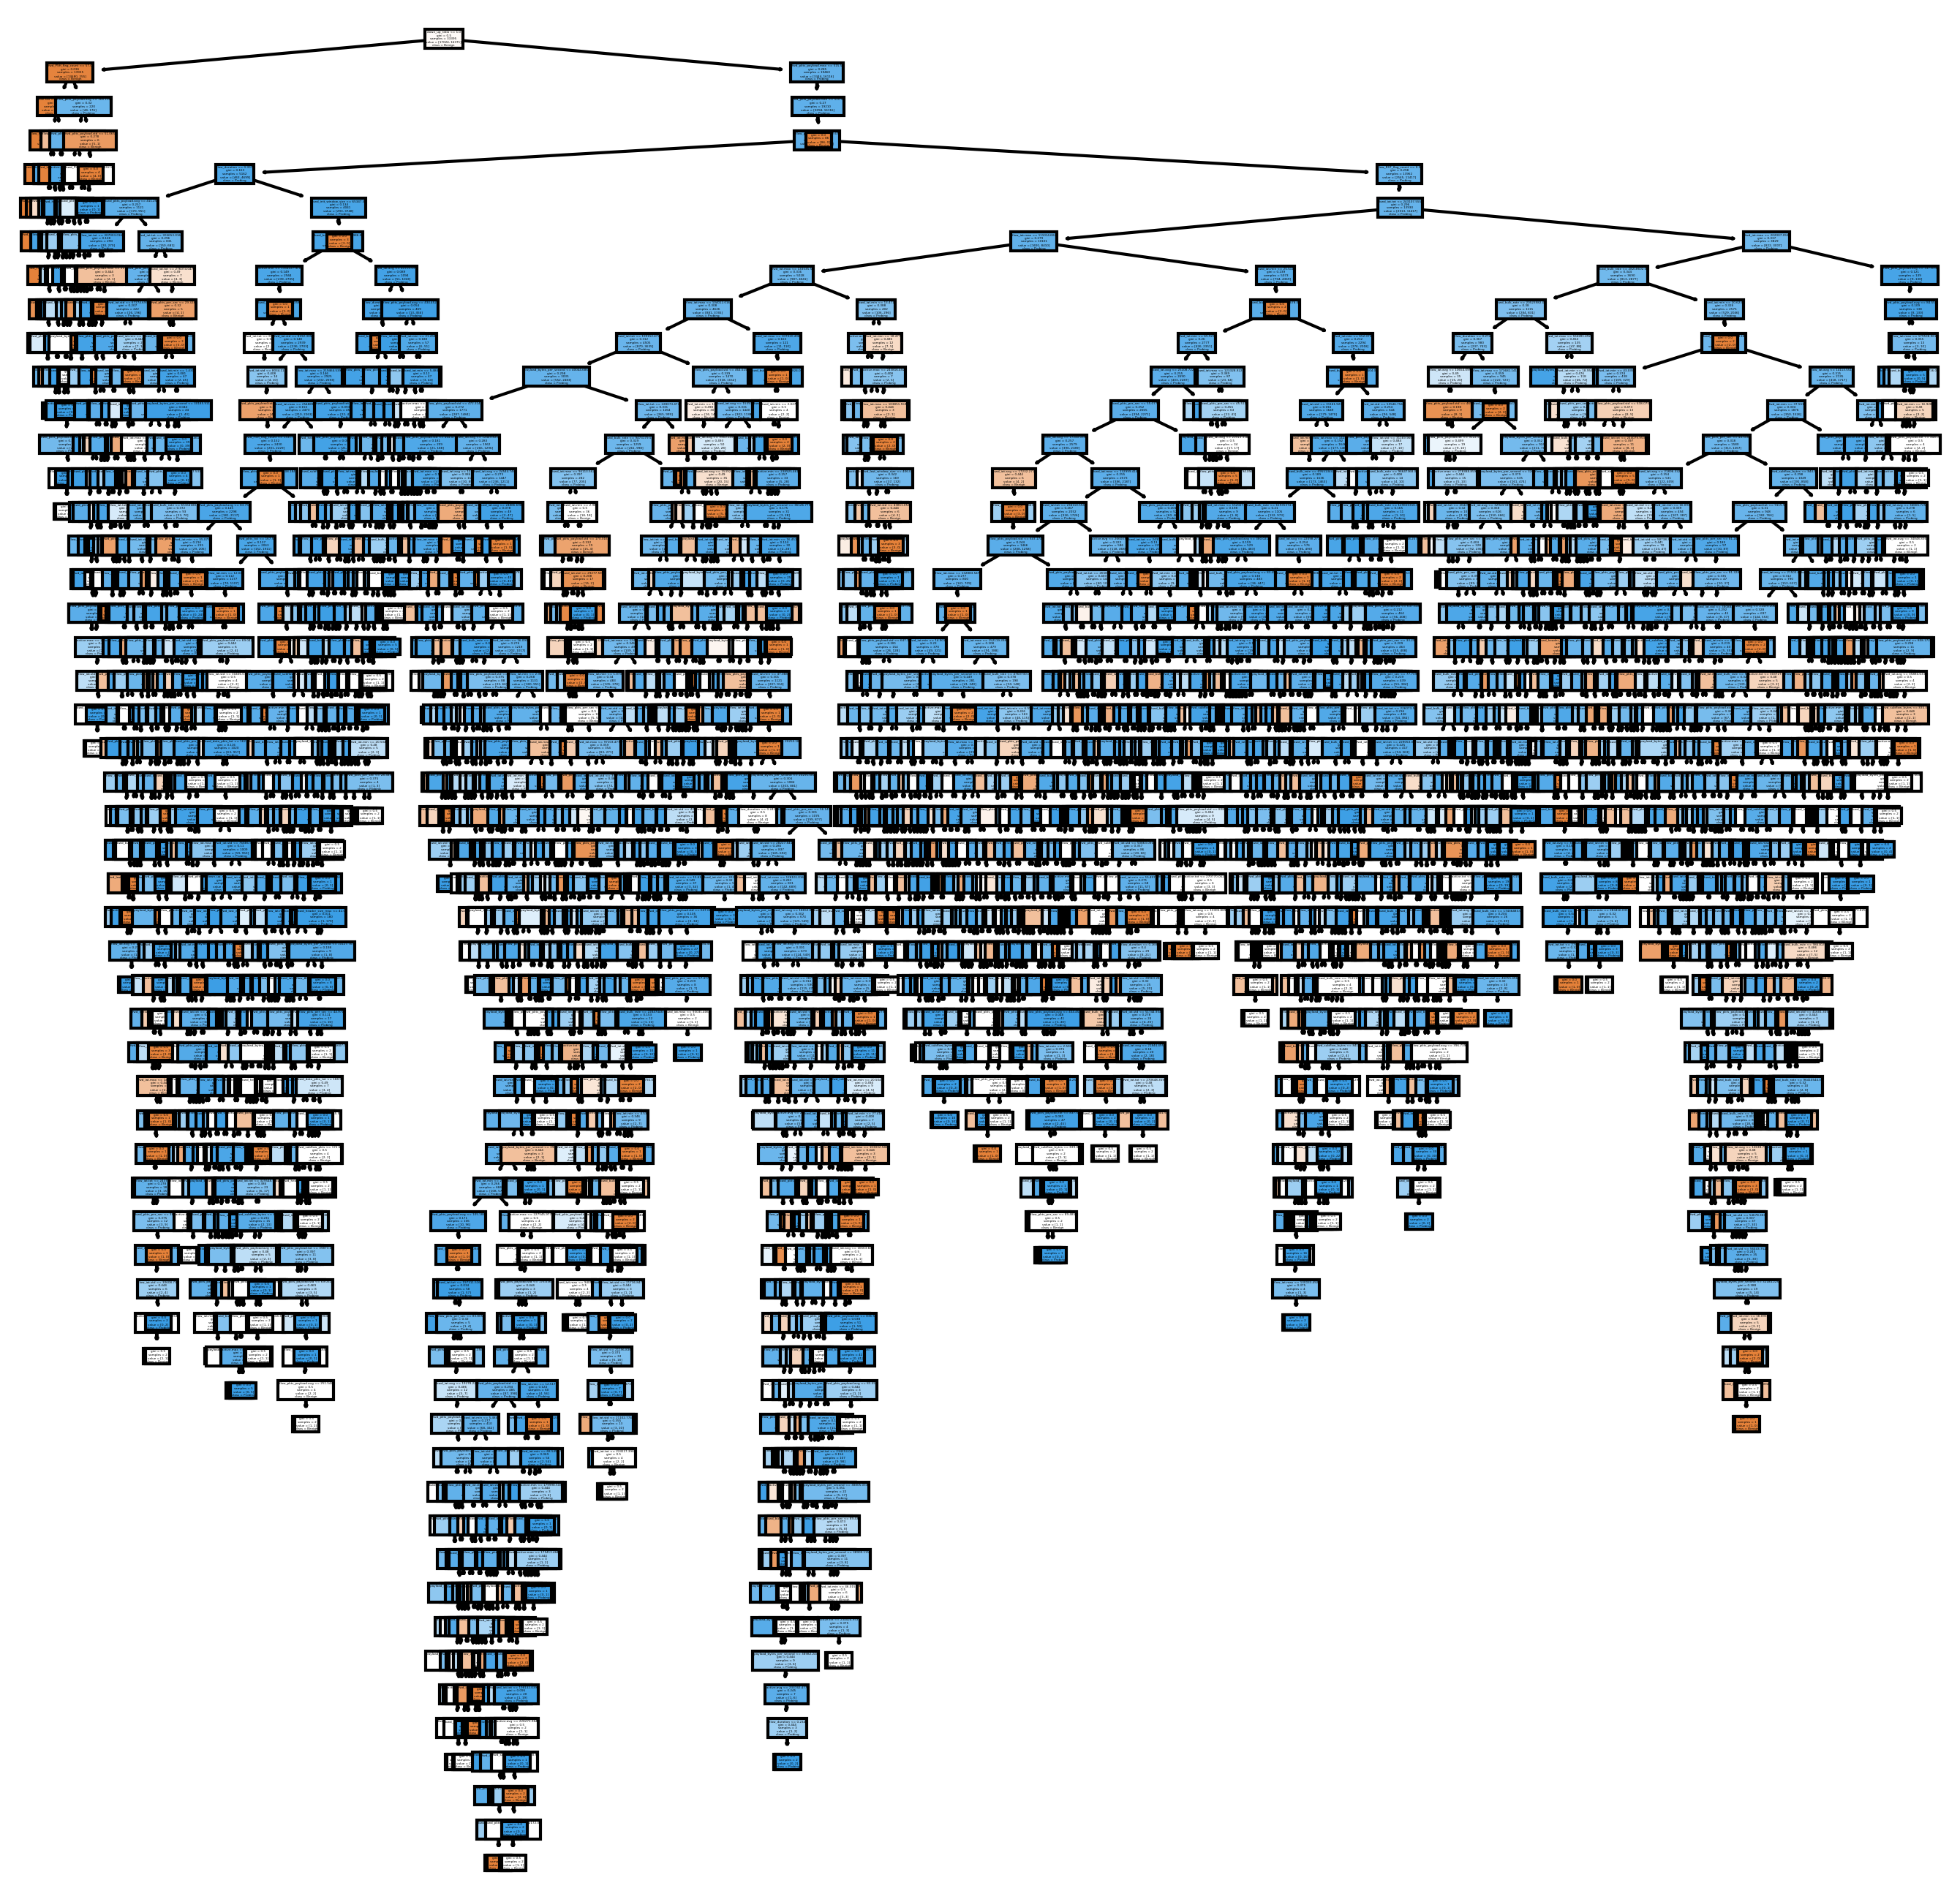

In [ ]:
from sklearn import tree

dt_fig_1, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (11,11), dpi=300)
tree.plot_tree(dt,
               feature_names=X.columns,
                       class_names=['Benign', 'Probing'],
                      #class_names=['Benign', 'Background','Probing','Bruteforce','Bruteforce-XML','XMRIGCC Cryptominer'],
                       filled=True);

#dt_fig.savefig('dt_fig.png')
tree_fig = dt_fig_1.figure
run["decision_tree_1"].upload(tree_fig)

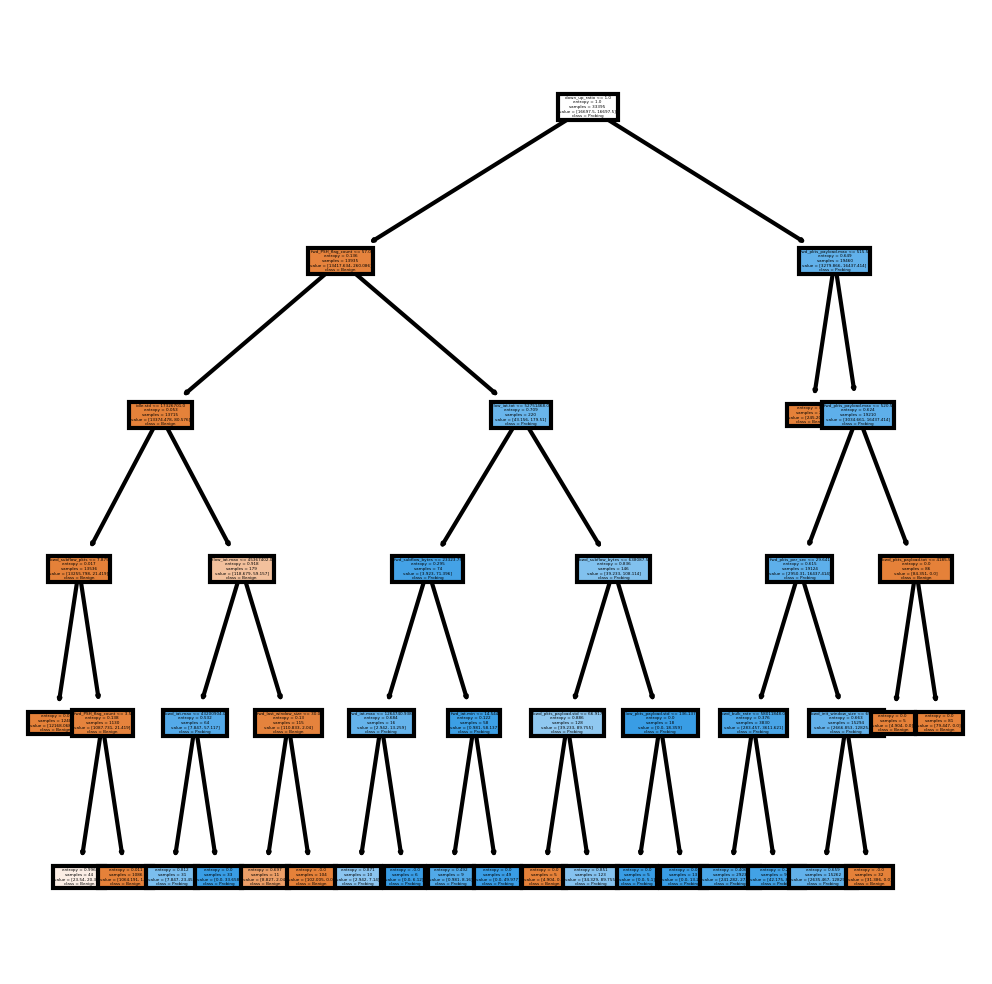

In [ ]:
from sklearn import tree

dt_fig_2, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(dt_best,
               feature_names=X.columns,
                       class_names=['Benign', 'Probing'],
                      #class_names=['Benign', 'Background','Probing','Bruteforce','Bruteforce-XML','XMRIGCC Cryptominer'],
                       filled=True);

#dt_fig.savefig('dt_fig.png')
best_tree_fig = dt_fig.figure
run["decision_tree"].upload(best_tree_fig)

{'Benign': {'precision': 0.9971798274717982, 'recall': 0.8238760964912281, 'f1-score': 0.9022815971179825, 'support': 7296}, 'Probing': {'precision': 0.8449004224502112, 'recall': 0.9975773122416988, 'f1-score': 0.9149130832570905, 'support': 7017}, 'accuracy': 0.9090337455460071, 'macro avg': {'precision': 0.9210401249610047, 'recall': 0.9107267043664634, 'f1-score': 0.9085973401875365, 'support': 14313}, 'weighted avg': {'precision': 0.9225242985794293, 'recall': 0.9090337455460071, 'f1-score': 0.9084742288680083, 'support': 14313}}


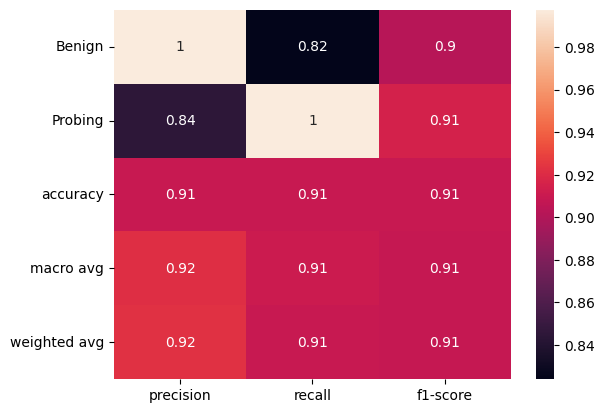

In [ ]:
#PREDICT USING BEST PARAMETER
y_pred_top_best=dt_best.predict(X_test)

report_best = (classification_report(y_test, y_pred_top_best, output_dict=True))
print(report_best)

class_rep_best = sns.heatmap(pd.DataFrame(report_best).iloc[:-1, :].T, annot=True)

# Convert Seaborn object to Matplotlib format (matplotlib.Figure)
CRB = class_rep_best.figure

In [ ]:
df_bp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_top_best.flatten()})
df_bp

In [ ]:
report_best = classification_report(y_test, y_pred_top_best)
print("Result using Top Feature with Best Parameter")
print(report_best)

Result using Top Feature with Best Parameter
              precision    recall  f1-score   support

      Benign       1.00      0.82      0.90      7296
     Probing       0.84      1.00      0.91      7017

    accuracy                           0.91     14313
   macro avg       0.92      0.91      0.91     14313
weighted avg       0.92      0.91      0.91     14313



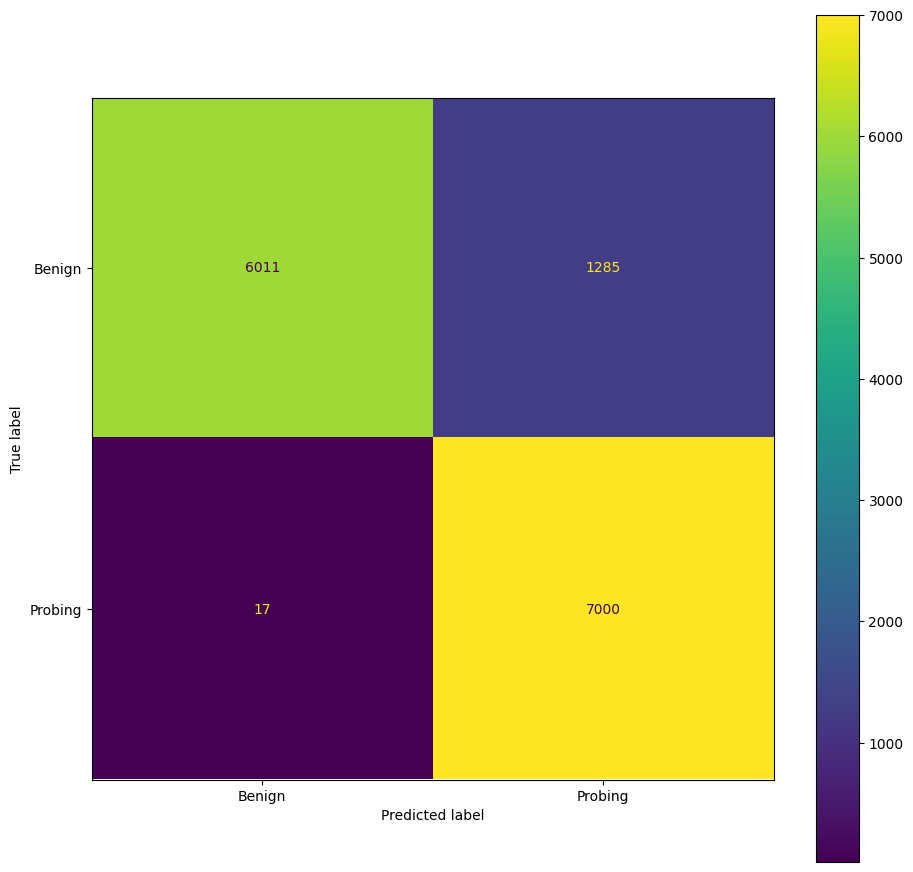

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

cm = confusion_matrix(y_test, y_pred_top_best, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
fig_best, ax = plt.subplots(figsize=(11,11))
disp.plot(ax=ax)
plt.show()

In [ ]:
#D tree disgram

from io import StringIO
from IPython.display import Image, display

from sklearn.tree import export_graphviz

try:
    import pydotplus
    pydotplus_installed = True
    
except:
    print('PyDotPlus must be installed to execute the remainder of the cells associated with this question.')
    print('Please see the instructions for this question for details.')
    pydotplus_installed = False

if pydotplus_installed:
    
    # Create an output destination for the file
    dot_data = StringIO()

    export_graphviz(dt, out_file=dot_data, filled=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

    # View the tree image
    filename = 'dt_tree.png'
    graph.write_png(filename)
    img = Image(filename=filename)
    display(img)
    
else:
    print('This cell not executed because PyDotPlus could not be loaded.')

#### Neptune run

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred, average='macro')
pre = precision_score(y_test,y_pred, average='macro')
rec = recall_score(y_test,y_pred, average='macro')

In [ ]:
# best score after cv and grid search only
acc_best = accuracy_score(y_test, y_pred_top_best)
f1_best = f1_score(y_test, y_pred_top_best, average='macro')
pre_best = precision_score(y_test, y_pred_top_best, average='macro')
rec_best = recall_score(y_test, y_pred_top_best, average='macro')

In [ ]:
# Logging by runtime

run["train_dataset"].track_files("/content/drive/MyDrive/ALLFLOWMETER_HIKARI2021.csv")
run["description"] = "Write desc here"

# score
run["Result/score"] = report
run["Result/accuracy"] = acc
run["Result/f1-score"] = f1
run["Result/precision"] = pre
run["Result/recall"] = rec
run["Result/classif_report"].upload(CR)
#run["decision_tree"].upload('dt_tree.png')
run["Result/confusion_matrix"] = fig
run["decision_tree"].upload(tree_fig)

In [ ]:
# best score after cv and grid search
run["Result_best/score"] = report
run["Result_best/accuracy"] = acc_best
run["Result_best/f1-score"] = f1_best
run["Result_best/precision"] = pre_best
run["Result_best/recall"] = rec_best
run["Result_best/classif_report_best"].upload(CRB)
run["Result_best/confusion_matrix_best"] = fig_best
run["decision_tree_best"].upload(best_tree_fig)

In [ ]:
# Logging by model
model = neptune.init_model(
    name="dt_benign_probing_balanced",
    key="DTBNPRBAL", 
    project="mikhailamzar/FYP2", 
    api_token=my_api_token,
)
#run["my_params"] = PARAMS
#run["description"] = "dt_default : This decision tree model was trained with default data without no resampling method applied."

model["Dataset"].track_files("/content/drive/MyDrive/ALLFLOWMETER_HIKARI2021.csv")
model["Result/score"] = report
model["Result/accuracy"] = acc
model["Result/f1-score"] = f1
model["Result/precision"] = pre
model["Result/recall"] = rec
model["Result/classif_report"].upload(CR)
#model["decision_tree"].upload('dt_tree.png')
model["Result/confusion_matrix"] = fig
model["decision_tree"].upload(tree_fig)

https://app.neptune.ai/mikhailamzar/FYP2/m/FYP-DTBNPRBAL


In [ ]:
# Logging by model
# Best score after cv and grid search

model["Result_best/score"] = report
model["Result_best/accuracy"] = acc_best
model["Result_best/f1-score"] = f1_best
model["Result_best/precision"] = pre_best
model["Result_best/recall"] = rec_best
model["Result_best/classif_report_best"].upload(CRB)
model["Result_best/confusion_matrix_best"] = fig_best
model["decision_tree_best"].upload(best_tree_fig)

In [ ]:
run.stop()

Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 1 operations to synchronize with Neptune. Do not kill this process.
All 1 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/mikhailamzar/FYP2/e/FYP-25/metadata


## Background n XMRIGCC

In [ ]:
df = df[ (df['traffic_category'] != "Bruteforce") & (df['traffic_category'] != "Bruteforce-XML") & (df['traffic_category'] != "Benign") & (df['traffic_category'] != "Probing")]
df.traffic_category.value_counts()

Background             170151
XMRIGCC CryptoMiner      3279
Name: traffic_category, dtype: int64

In [ ]:
df.head(3)

In [ ]:
X=df.drop(['Label','traffic_category'], axis=1)

top_col=['flow_pkts_payload.std','flow_iat.min','flow_pkts_payload.max','down_up_ratio','fwd_pkts_payload.max','fwd_iat.min','fwd_subflow_bytes','flow_iat.max','payload_bytes_per_second','active.tot','bwd_iat.tot','flow_iat.std','flow_pkts_payload.min','fwd_last_window_size','active.min','bwd_pkts_payload.min','fwd_iat.max','fwd_header_size_tot','bwd_iat.max','bwd_iat.std','bwd_init_window_size','bwd_iat.min','fwd_pkts_payload.std','fwd_iat.std','fwd_init_window_size','flow_duration','flow_duration','flow_iat.avg','flow_pkts_payload.tot','fwd_iat.tot','bwd_pkts_payload.std','bwd_iat.avg','fwd_pkts_per_sec','flow_pkts_payload.avg','active.max','fwd_pkts_payload.tot','active,avg','bwd_pkts_payload.avg','fwd_header_size_max','fwd_pkts_payload.avg']
X_top = df[[c for c in df.columns if c in top_col]]

#y=df.traffic_category
y=df.traffic_category

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
X.shape

(173430, 79)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy',class_weight='balanced',random_state=1)
dt = dt.fit(X_train, y_train)

In [ ]:
y_pred=dt.predict(X_test)

from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

                     precision    recall  f1-score   support

         Background       0.99      0.99      0.99     51045
XMRIGCC CryptoMiner       0.52      0.56      0.54       984

           accuracy                           0.98     52029
          macro avg       0.75      0.78      0.76     52029
       weighted avg       0.98      0.98      0.98     52029



In [ ]:
y_pred=dt.predict(X_test)

from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

                     precision    recall  f1-score   support

         Background       0.99      0.99      0.99     51045
XMRIGCC CryptoMiner       0.51      0.55      0.53       984

           accuracy                           0.98     52029
          macro avg       0.75      0.77      0.76     52029
       weighted avg       0.98      0.98      0.98     52029



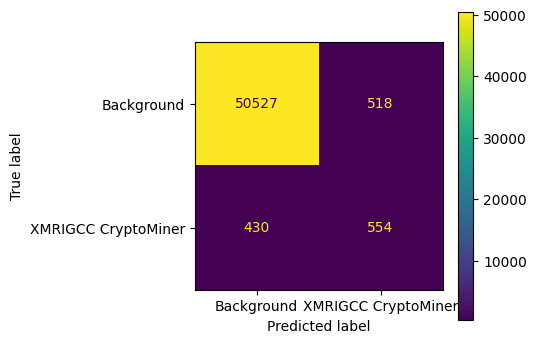

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

cm = confusion_matrix(y_test, y_pred, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax)
plt.show()

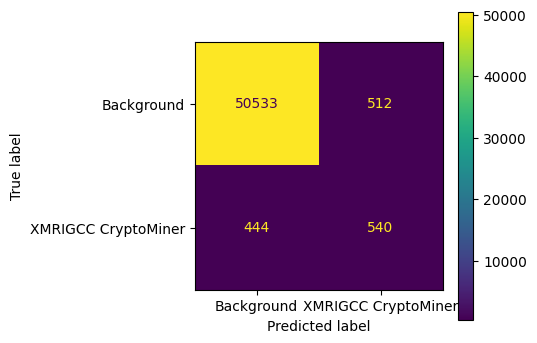

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

cm = confusion_matrix(y_test, y_pred, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax)
plt.show()

In [ ]:
run["train_dataset"].track_files("/content/drive/MyDrive/ALLFLOWMETER_HIKARI2021.csv")

PARAMS = {"criterion (entropy)| class_weight (balanced)| test_size (0.3)":"."}
 
run["my_params"] = PARAMS

# You can also specify parameters one by one
run["my_params/batch_size"] = 100

# Update lr value
run["Result/score"] = report

#run["Result/confusion_matrix"] = fig

In [ ]:
model = neptune.init_model(
    name="dt_Bg_XMR",
    key="TESTDT", 
    project="mikhailamzar/FYP2", 
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiIyYTFlNWIyZS1hODI3LTQ2YTQtOGY3Zi04NTE0MjY4MDA4MGYifQ==", # your credentials
)

https://app.neptune.ai/mikhailamzar/FYP2/m/FYP-TESTDT


In [ ]:
model["Dataset"].track_files("/content/drive/MyDrive/ALLFLOWMETER_HIKARI2021.csv")
model["Result/score"] = report_def_u
model["Result/accuracy"] = acc
model["Result/f1-score"] = f1
model["Result/precision"] = pre
model["Result/recall"] = rec
model["Result/confusion_matrix"] = fig

In [ ]:
from io import StringIO
from IPython.display import Image, display

from sklearn.tree import export_graphviz

try:
    import pydotplus
    pydotplus_installed = True
    
except:
    print('PyDotPlus must be installed to execute the remainder of the cells associated with this question.')
    print('Please see the instructions for this question for details.')
    pydotplus_installed = False

if pydotplus_installed:
    
    # Create an output destination for the file
    dot_data = StringIO()

    export_graphviz(dt, out_file=dot_data, filled=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

    # View the tree image
    filename = 'dt_tree.png'
    graph.write_png(filename)
    img = Image(filename=filename)
    display(img)
    
else:
    print('This cell not executed because PyDotPlus could not be loaded.')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from io import StringIO
from IPython.display import Image, display

from sklearn.tree import export_graphviz

try:
    import pydotplus
    pydotplus_installed = True
    
except:
    print('PyDotPlus must be installed to execute the remainder of the cells associated with this question.')
    print('Please see the instructions for this question for details.')
    pydotplus_installed = False

if pydotplus_installed:
    
    # Create an output destination for the file
    dot_data = StringIO()

    export_graphviz(dt, out_file=dot_data, filled=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

    # View the tree image
    filename = 'dt_tree.png'
    graph.write_png(filename)
    img = Image(filename=filename)
    display(img)
    
else:
    print('This cell not executed because PyDotPlus could not be loaded.')

Output hidden; open in https://colab.research.google.com to view.

## Background n Probing

In [ ]:
df = df[ (df['traffic_category'] != "Bruteforce-XML") & (df['traffic_category'] != "XMRIGCC CryptoMiner") & (df['traffic_category'] != "Benign") & (df['traffic_category'] != "Bruteforce")]
df.traffic_category.value_counts()

Background    170151
Probing        23388
Name: traffic_category, dtype: int64

In [ ]:
df.head(3)

### encode

In [ ]:
df_one = pd.get_dummies(df["traffic_category"])
#print(df_one)

In [ ]:
df_two = pd.concat((df_one, df), axis=1)

In [ ]:
df_two = df_two.drop(["Probing"], axis=1)
df_3 = df_two.rename(columns={"Bruteforce": "Target"})

In [ ]:
df_3.columns

Index(['Target', 'flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot',
       'fwd_data_pkts_tot', 'bwd_data_pkts_tot', 'fwd_pkts_per_sec',
       'bwd_pkts_per_sec', 'flow_pkts_per_sec', 'down_up_ratio',
       'fwd_header_size_tot', 'fwd_header_size_min', 'fwd_header_size_max',
       'bwd_header_size_tot', 'bwd_header_size_min', 'bwd_header_size_max',
       'flow_FIN_flag_count', 'flow_SYN_flag_count', 'flow_RST_flag_count',
       'fwd_PSH_flag_count', 'bwd_PSH_flag_count', 'flow_ACK_flag_count',
       'fwd_URG_flag_count', 'bwd_URG_flag_count', 'flow_CWR_flag_count',
       'flow_ECE_flag_count', 'fwd_pkts_payload.min', 'fwd_pkts_payload.max',
       'fwd_pkts_payload.tot', 'fwd_pkts_payload.avg', 'fwd_pkts_payload.std',
       'bwd_pkts_payload.min', 'bwd_pkts_payload.max', 'bwd_pkts_payload.tot',
       'bwd_pkts_payload.avg', 'bwd_pkts_payload.std', 'flow_pkts_payload.min',
       'flow_pkts_payload.max', 'flow_pkts_payload.tot',
       'flow_pkts_payload.avg', 'flow_pkts_payload.

### cont

In [ ]:
X=df.drop(['Label','traffic_category'], axis=1)

top_col=['flow_pkts_payload.std','flow_iat.min','flow_pkts_payload.max','down_up_ratio','fwd_pkts_payload.max','fwd_iat.min','fwd_subflow_bytes','flow_iat.max','payload_bytes_per_second','active.tot','bwd_iat.tot','flow_iat.std','flow_pkts_payload.min','fwd_last_window_size','active.min','bwd_pkts_payload.min','fwd_iat.max','fwd_header_size_tot','bwd_iat.max','bwd_iat.std','bwd_init_window_size','bwd_iat.min','fwd_pkts_payload.std','fwd_iat.std','fwd_init_window_size','flow_duration','flow_duration','flow_iat.avg','flow_pkts_payload.tot','fwd_iat.tot','bwd_pkts_payload.std','bwd_iat.avg','fwd_pkts_per_sec','flow_pkts_payload.avg','active.max','fwd_pkts_payload.tot','active,avg','bwd_pkts_payload.avg','fwd_header_size_max','fwd_pkts_payload.avg']
X_top = df[[c for c in df.columns if c in top_col]]

#y=df.traffic_category
y=df.traffic_category

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
df.dtypes

In [ ]:
y_train

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy',class_weight='balanced',random_state=1)
dt = dt.fit(X_train, y_train)

In [ ]:
y_pred=dt.predict(X_test)

from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

  Background       1.00      1.00      1.00     51046
     Probing       1.00      1.00      1.00      7016

    accuracy                           1.00     58062
   macro avg       1.00      1.00      1.00     58062
weighted avg       1.00      1.00      1.00     58062



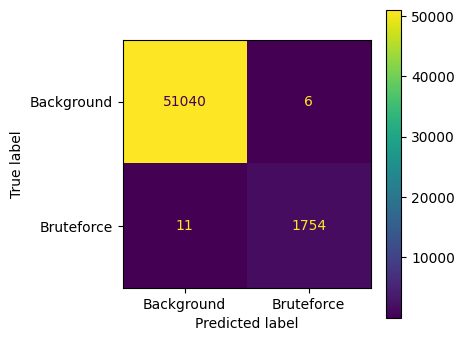

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

cm = confusion_matrix(y_test, y_pred, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax)
plt.show()

## Background n Bruteforce

In [ ]:
df = df[ (df['traffic_category'] != "Bruteforce-XML") & (df['traffic_category'] != "XMRIGCC CryptoMiner") & (df['traffic_category'] != "Benign") & (df['traffic_category'] != "Probing")]
df.traffic_category.value_counts()

Background    170151
Bruteforce      5884
Name: traffic_category, dtype: int64

In [ ]:
df.head(3)

### encode

In [ ]:
df_one = pd.get_dummies(df["traffic_category"])
#print(df_one)

In [ ]:
df_two = pd.concat((df_one, df), axis=1)

In [ ]:
df_two = df_two.drop(["Probing"], axis=1)
df_3 = df_two.rename(columns={"Bruteforce": "Target"})

In [ ]:
df_3.columns

Index(['Target', 'flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot',
       'fwd_data_pkts_tot', 'bwd_data_pkts_tot', 'fwd_pkts_per_sec',
       'bwd_pkts_per_sec', 'flow_pkts_per_sec', 'down_up_ratio',
       'fwd_header_size_tot', 'fwd_header_size_min', 'fwd_header_size_max',
       'bwd_header_size_tot', 'bwd_header_size_min', 'bwd_header_size_max',
       'flow_FIN_flag_count', 'flow_SYN_flag_count', 'flow_RST_flag_count',
       'fwd_PSH_flag_count', 'bwd_PSH_flag_count', 'flow_ACK_flag_count',
       'fwd_URG_flag_count', 'bwd_URG_flag_count', 'flow_CWR_flag_count',
       'flow_ECE_flag_count', 'fwd_pkts_payload.min', 'fwd_pkts_payload.max',
       'fwd_pkts_payload.tot', 'fwd_pkts_payload.avg', 'fwd_pkts_payload.std',
       'bwd_pkts_payload.min', 'bwd_pkts_payload.max', 'bwd_pkts_payload.tot',
       'bwd_pkts_payload.avg', 'bwd_pkts_payload.std', 'flow_pkts_payload.min',
       'flow_pkts_payload.max', 'flow_pkts_payload.tot',
       'flow_pkts_payload.avg', 'flow_pkts_payload.

### cont

In [ ]:
X=df.drop(['Label','traffic_category'], axis=1)

top_col=['flow_pkts_payload.std','flow_iat.min','flow_pkts_payload.max','down_up_ratio','fwd_pkts_payload.max','fwd_iat.min','fwd_subflow_bytes','flow_iat.max','payload_bytes_per_second','active.tot','bwd_iat.tot','flow_iat.std','flow_pkts_payload.min','fwd_last_window_size','active.min','bwd_pkts_payload.min','fwd_iat.max','fwd_header_size_tot','bwd_iat.max','bwd_iat.std','bwd_init_window_size','bwd_iat.min','fwd_pkts_payload.std','fwd_iat.std','fwd_init_window_size','flow_duration','flow_duration','flow_iat.avg','flow_pkts_payload.tot','fwd_iat.tot','bwd_pkts_payload.std','bwd_iat.avg','fwd_pkts_per_sec','flow_pkts_payload.avg','active.max','fwd_pkts_payload.tot','active,avg','bwd_pkts_payload.avg','fwd_header_size_max','fwd_pkts_payload.avg']
X_top = df[[c for c in df.columns if c in top_col]]

#y=df.traffic_category
y=df.traffic_category

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
df.dtypes

In [ ]:
y_train

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy',class_weight='balanced',random_state=1)
dt = dt.fit(X_train, y_train)

In [ ]:
y_pred=dt.predict(X_test)

from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

  Background       1.00      1.00      1.00     51046
  Bruteforce       1.00      0.99      1.00      1765

    accuracy                           1.00     52811
   macro avg       1.00      1.00      1.00     52811
weighted avg       1.00      1.00      1.00     52811



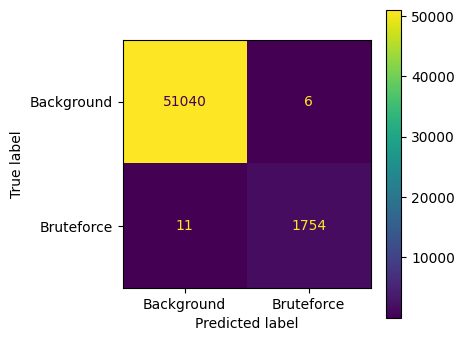

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

cm = confusion_matrix(y_test, y_pred, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax)
plt.show()

## Bruteforce n Probing

In [ ]:
df = df[ (df['traffic_category'] != "Bruteforce-XML") & (df['traffic_category'] != "XMRIGCC CryptoMiner") & (df['traffic_category'] != "Background") & (df['traffic_category'] != "Benign")]
df.traffic_category.value_counts()

Probing       23388
Bruteforce     5884
Name: traffic_category, dtype: int64

In [ ]:
df.head(3)

### encode

In [ ]:
df_one = pd.get_dummies(df["traffic_category"])
#print(df_one)

In [ ]:
df_two = pd.concat((df_one, df), axis=1)

In [ ]:
df_two = df_two.drop(["Probing"], axis=1)
df_3 = df_two.rename(columns={"Bruteforce": "Target"})

In [ ]:
df_3.columns

Index(['Target', 'flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot',
       'fwd_data_pkts_tot', 'bwd_data_pkts_tot', 'fwd_pkts_per_sec',
       'bwd_pkts_per_sec', 'flow_pkts_per_sec', 'down_up_ratio',
       'fwd_header_size_tot', 'fwd_header_size_min', 'fwd_header_size_max',
       'bwd_header_size_tot', 'bwd_header_size_min', 'bwd_header_size_max',
       'flow_FIN_flag_count', 'flow_SYN_flag_count', 'flow_RST_flag_count',
       'fwd_PSH_flag_count', 'bwd_PSH_flag_count', 'flow_ACK_flag_count',
       'fwd_URG_flag_count', 'bwd_URG_flag_count', 'flow_CWR_flag_count',
       'flow_ECE_flag_count', 'fwd_pkts_payload.min', 'fwd_pkts_payload.max',
       'fwd_pkts_payload.tot', 'fwd_pkts_payload.avg', 'fwd_pkts_payload.std',
       'bwd_pkts_payload.min', 'bwd_pkts_payload.max', 'bwd_pkts_payload.tot',
       'bwd_pkts_payload.avg', 'bwd_pkts_payload.std', 'flow_pkts_payload.min',
       'flow_pkts_payload.max', 'flow_pkts_payload.tot',
       'flow_pkts_payload.avg', 'flow_pkts_payload.

### cont

In [ ]:
X=df.drop(['Label','traffic_category'], axis=1)

top_col=['flow_pkts_payload.std','flow_iat.min','flow_pkts_payload.max','down_up_ratio','fwd_pkts_payload.max','fwd_iat.min','fwd_subflow_bytes','flow_iat.max','payload_bytes_per_second','active.tot','bwd_iat.tot','flow_iat.std','flow_pkts_payload.min','fwd_last_window_size','active.min','bwd_pkts_payload.min','fwd_iat.max','fwd_header_size_tot','bwd_iat.max','bwd_iat.std','bwd_init_window_size','bwd_iat.min','fwd_pkts_payload.std','fwd_iat.std','fwd_init_window_size','flow_duration','flow_duration','flow_iat.avg','flow_pkts_payload.tot','fwd_iat.tot','bwd_pkts_payload.std','bwd_iat.avg','fwd_pkts_per_sec','flow_pkts_payload.avg','active.max','fwd_pkts_payload.tot','active,avg','bwd_pkts_payload.avg','fwd_header_size_max','fwd_pkts_payload.avg']
X_top = df[[c for c in df.columns if c in top_col]]

#y=df.traffic_category
y=df.traffic_category

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
df.dtypes

In [ ]:
y_train

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy', class_weight='balanced', random_state=1)
dt = dt.fit(X_train, y_train)

In [ ]:
y_pred=dt.predict(X_test)

from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

  Bruteforce       1.00      1.00      1.00      1765
     Probing       1.00      1.00      1.00      7017

    accuracy                           1.00      8782
   macro avg       1.00      1.00      1.00      8782
weighted avg       1.00      1.00      1.00      8782



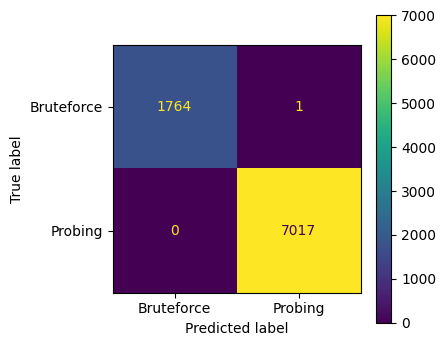

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

cm = confusion_matrix(y_test, y_pred, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax)
plt.show()

## Probing n Benign

In [ ]:
df = df[ (df['traffic_category'] != "Bruteforce-XML") & (df['traffic_category'] != "XMRIGCC CryptoMiner") & (df['traffic_category'] != "Background") & (df['traffic_category'] != "Bruteforce")]
df.traffic_category.value_counts()

Benign     347431
Probing     23388
Name: traffic_category, dtype: int64

In [ ]:
df.head(3)

### encode

In [ ]:
df_one = pd.get_dummies(df["traffic_category"])
#print(df_one)

In [ ]:
df_two = pd.concat((df_one, df), axis=1)

In [ ]:
df_two = df_two.drop(["Probing"], axis=1)
df_3 = df_two.rename(columns={"Bruteforce": "Target"})

In [ ]:
df_3.columns

Index(['Target', 'flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot',
       'fwd_data_pkts_tot', 'bwd_data_pkts_tot', 'fwd_pkts_per_sec',
       'bwd_pkts_per_sec', 'flow_pkts_per_sec', 'down_up_ratio',
       'fwd_header_size_tot', 'fwd_header_size_min', 'fwd_header_size_max',
       'bwd_header_size_tot', 'bwd_header_size_min', 'bwd_header_size_max',
       'flow_FIN_flag_count', 'flow_SYN_flag_count', 'flow_RST_flag_count',
       'fwd_PSH_flag_count', 'bwd_PSH_flag_count', 'flow_ACK_flag_count',
       'fwd_URG_flag_count', 'bwd_URG_flag_count', 'flow_CWR_flag_count',
       'flow_ECE_flag_count', 'fwd_pkts_payload.min', 'fwd_pkts_payload.max',
       'fwd_pkts_payload.tot', 'fwd_pkts_payload.avg', 'fwd_pkts_payload.std',
       'bwd_pkts_payload.min', 'bwd_pkts_payload.max', 'bwd_pkts_payload.tot',
       'bwd_pkts_payload.avg', 'bwd_pkts_payload.std', 'flow_pkts_payload.min',
       'flow_pkts_payload.max', 'flow_pkts_payload.tot',
       'flow_pkts_payload.avg', 'flow_pkts_payload.

### cont

In [ ]:
X=df.drop(['Label','traffic_category'], axis=1)

top_col=['flow_pkts_payload.std','flow_iat.min','flow_pkts_payload.max','down_up_ratio','fwd_pkts_payload.max','fwd_iat.min','fwd_subflow_bytes','flow_iat.max','payload_bytes_per_second','active.tot','bwd_iat.tot','flow_iat.std','flow_pkts_payload.min','fwd_last_window_size','active.min','bwd_pkts_payload.min','fwd_iat.max','fwd_header_size_tot','bwd_iat.max','bwd_iat.std','bwd_init_window_size','bwd_iat.min','fwd_pkts_payload.std','fwd_iat.std','fwd_init_window_size','flow_duration','flow_duration','flow_iat.avg','flow_pkts_payload.tot','fwd_iat.tot','bwd_pkts_payload.std','bwd_iat.avg','fwd_pkts_per_sec','flow_pkts_payload.avg','active.max','fwd_pkts_payload.tot','active,avg','bwd_pkts_payload.avg','fwd_header_size_max','fwd_pkts_payload.avg']
X_top = df[[c for c in df.columns if c in top_col]]

#y=df.traffic_category
y=df.traffic_category

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
df.dtypes

In [ ]:
y_train

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=1)
dt = dt.fit(X_train, y_train)

In [ ]:
y_pred=dt.predict(X_test)

from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

      Benign       0.94      0.94      0.94    104230
     Probing       0.04      0.04      0.04      7016

    accuracy                           0.88    111246
   macro avg       0.49      0.49      0.49    111246
weighted avg       0.88      0.88      0.88    111246



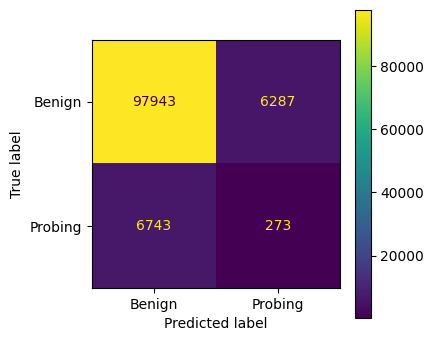

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

cm = confusion_matrix(y_test, y_pred, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax)
plt.show()

## Probing n Background

In [ ]:
df = df[ (df['traffic_category'] != "Bruteforce-XML") & (df['traffic_category'] != "XMRIGCC CryptoMiner") & (df['traffic_category'] != "Benign") & (df['traffic_category'] != "Bruteforce")]
df.traffic_category.value_counts()

Background    170151
Probing        23388
Name: traffic_category, dtype: int64

In [ ]:
df.head(3)

### encode

In [ ]:
df_one = pd.get_dummies(df["traffic_category"])
#print(df_one)

In [ ]:
df_two = pd.concat((df_one, df), axis=1)

In [ ]:
df_two = df_two.drop(["Probing"], axis=1)
df_3 = df_two.rename(columns={"Bruteforce": "Target"})

In [ ]:
df_3.columns

Index(['Target', 'flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot',
       'fwd_data_pkts_tot', 'bwd_data_pkts_tot', 'fwd_pkts_per_sec',
       'bwd_pkts_per_sec', 'flow_pkts_per_sec', 'down_up_ratio',
       'fwd_header_size_tot', 'fwd_header_size_min', 'fwd_header_size_max',
       'bwd_header_size_tot', 'bwd_header_size_min', 'bwd_header_size_max',
       'flow_FIN_flag_count', 'flow_SYN_flag_count', 'flow_RST_flag_count',
       'fwd_PSH_flag_count', 'bwd_PSH_flag_count', 'flow_ACK_flag_count',
       'fwd_URG_flag_count', 'bwd_URG_flag_count', 'flow_CWR_flag_count',
       'flow_ECE_flag_count', 'fwd_pkts_payload.min', 'fwd_pkts_payload.max',
       'fwd_pkts_payload.tot', 'fwd_pkts_payload.avg', 'fwd_pkts_payload.std',
       'bwd_pkts_payload.min', 'bwd_pkts_payload.max', 'bwd_pkts_payload.tot',
       'bwd_pkts_payload.avg', 'bwd_pkts_payload.std', 'flow_pkts_payload.min',
       'flow_pkts_payload.max', 'flow_pkts_payload.tot',
       'flow_pkts_payload.avg', 'flow_pkts_payload.

### cont

In [ ]:
X=df.drop(['Label','traffic_category'], axis=1)

top_col=['flow_pkts_payload.std','flow_iat.min','flow_pkts_payload.max','down_up_ratio','fwd_pkts_payload.max','fwd_iat.min','fwd_subflow_bytes','flow_iat.max','payload_bytes_per_second','active.tot','bwd_iat.tot','flow_iat.std','flow_pkts_payload.min','fwd_last_window_size','active.min','bwd_pkts_payload.min','fwd_iat.max','fwd_header_size_tot','bwd_iat.max','bwd_iat.std','bwd_init_window_size','bwd_iat.min','fwd_pkts_payload.std','fwd_iat.std','fwd_init_window_size','flow_duration','flow_duration','flow_iat.avg','flow_pkts_payload.tot','fwd_iat.tot','bwd_pkts_payload.std','bwd_iat.avg','fwd_pkts_per_sec','flow_pkts_payload.avg','active.max','fwd_pkts_payload.tot','active,avg','bwd_pkts_payload.avg','fwd_header_size_max','fwd_pkts_payload.avg']
X_top = df[[c for c in df.columns if c in top_col]]

#y=df.traffic_category
y=df.traffic_category

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
df.dtypes

In [ ]:
y_train

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy',class_weight='balanced',random_state=1)
dt = dt.fit(X_train, y_train)

In [ ]:
y_pred=dt.predict(X_test)

from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

  Background       1.00      1.00      1.00     51046
     Probing       1.00      1.00      1.00      7016

    accuracy                           1.00     58062
   macro avg       1.00      1.00      1.00     58062
weighted avg       1.00      1.00      1.00     58062



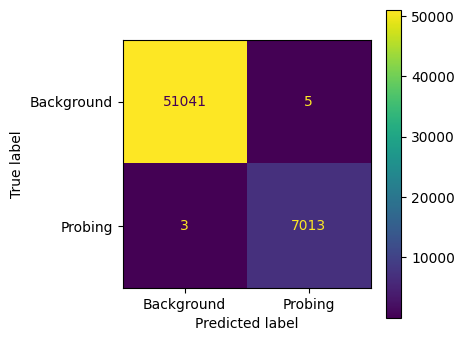

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

cm = confusion_matrix(y_test, y_pred, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax)
plt.show()

# neptune stop

In [ ]:
run.stop()
